In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk

from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from concurrent.futures import ProcessPoolExecutor


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:

import pandas as pd

#  correct file path and extension
file_path = "updated_data.json"

# Read the JSON file into a DataFrame
df = pd.read_json(file_path, lines=True)


In [5]:
# Display the first few rows of the DataFrame
df.head()

,_id,category,class,overall,reviewText,reviewTime
0,5a1321d5741a2384e802c552,Cell_Phones_and_Accessories,1,5,Best phone case ever . Everywhere I go I get a...,2013-01-13
1,5a1321d5741a2384e802c557,Cell_Phones_and_Accessories,0,1,ITEM NOT SENT from Blue Top Company in Hong Ko...,2013-01-30
2,5a1321d5741a2384e802c550,Cell_Phones_and_Accessories,1,5,Saw this same case at a theme park store for 2...,2012-11-22
3,5a1321d5741a2384e802c553,Cell_Phones_and_Accessories,1,5,case fits perfectly and I always gets complime...,2013-07-18
4,5a1321d5741a2384e802c559,Cell_Phones_and_Accessories,1,4,I got this for my 14 year old sister. She lov...,2013-03-20


In [6]:
df.shape

(3185845, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185845 entries, 0 to 3185844
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   category    object
 2   class       int64 
 3   overall     int64 
 4   reviewText  object
 5   reviewTime  object
dtypes: int64(2), object(4)
memory usage: 145.8+ MB


In [8]:
df.describe

<bound method NDFrame.describe of                               _id                     category  class  \
0        5a1321d5741a2384e802c552  Cell_Phones_and_Accessories      1   
1        5a1321d5741a2384e802c557  Cell_Phones_and_Accessories      0   
2        5a1321d5741a2384e802c550  Cell_Phones_and_Accessories      1   
3        5a1321d5741a2384e802c553  Cell_Phones_and_Accessories      1   
4        5a1321d5741a2384e802c559  Cell_Phones_and_Accessories      1   
...                           ...                          ...    ...   
3185840  5a13226d741a2384e8376caf  Cell_Phones_and_Accessories      1   
3185841  5a13226d741a2384e8376cb0  Cell_Phones_and_Accessories      1   
3185842  5a13226d741a2384e8376cb1  Cell_Phones_and_Accessories      1   
3185843  5a13226d741a2384e8376cb2  Cell_Phones_and_Accessories      1   
3185844  5a13226d741a2384e8376cb3  Cell_Phones_and_Accessories      1   

         overall                                         reviewText  \
0              5  

In [9]:
df['overall'].value_counts()

overall
5    1645831
4     609155
1     419264
3     295955
2     215640
Name: count, dtype: int64

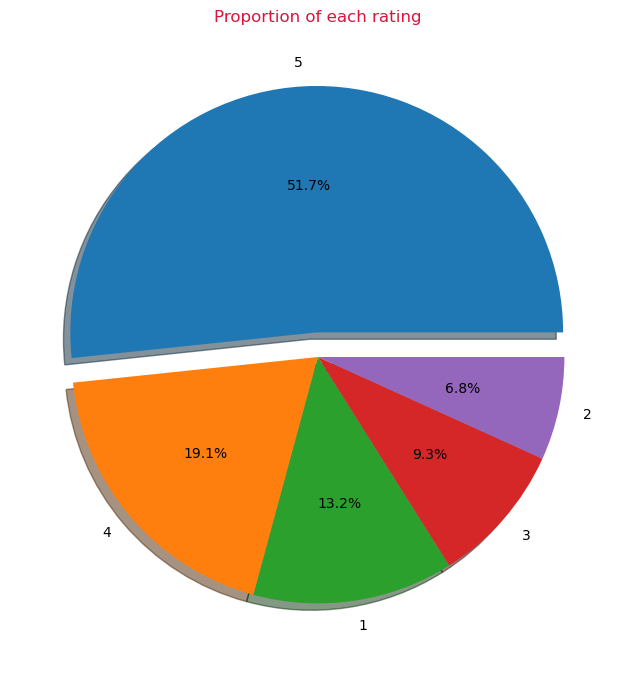

In [10]:
plt.figure(figsize=(15,8))
labels = df['overall'].value_counts().keys()
values = df['overall'].value_counts().values
explode = (0.1, 0, 0, 0, 0)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each rating', fontweight=25, pad=20, color='crimson')
plt.show()

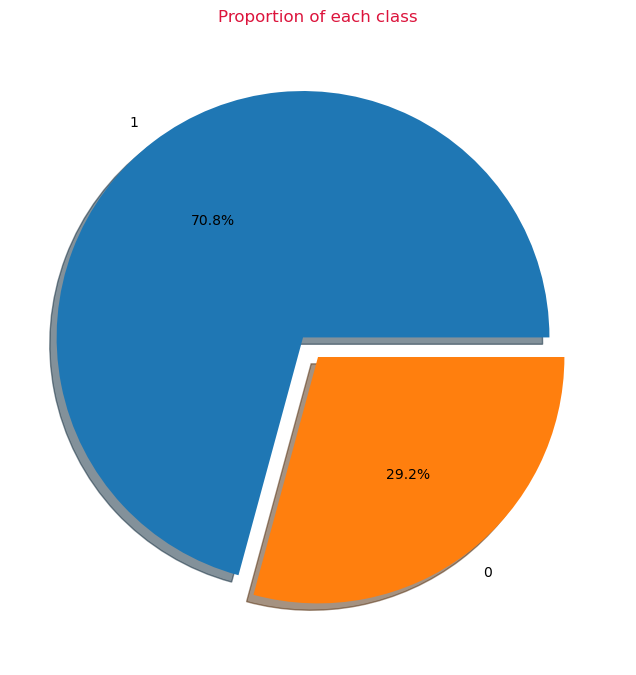

In [11]:
plt.figure(figsize=(15,8))
labels = df['class'].value_counts().keys()
values = df['class'].value_counts().values
explode = (0.1, 0,  )
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each class', fontweight=25, pad=20, color='crimson')
plt.show()

In [12]:
# Remove punctuation
# Remove stopwords
# Join the cleaned words into a string
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
 df['reviewText'][0], clean_text(df['reviewText'][0])

('Best phone case ever . Everywhere I go I get a ton of compliments on it. It was in perfect condition as well.',
 'Best phone case ever Everywhere go get ton compliments perfect condition well')

In [15]:
df['reviewText'].head().apply(clean_text)

0    Best phone case ever Everywhere go get ton com...
1    ITEM SENT Blue Top Company Hong Kong two month...
2    Saw case theme park store 25 dollars good qual...
3    case fits perfectly always gets compliments ha...
4    got 14 year old sister loves really really don...
Name: reviewText, dtype: object

In [16]:
#a smaller, random sample (1% of the original) from the DataFrame 
df_sampled = df.sample(frac=0.01, random_state=42) 

In [17]:
df_sampled.shape

(31858, 6)

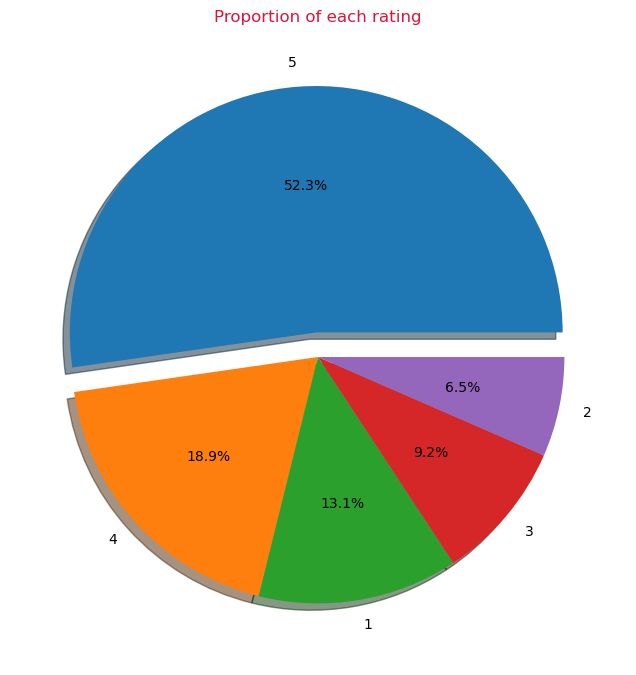

In [18]:
plt.figure(figsize=(15,8))
labels = df_sampled['overall'].value_counts().keys()
values = df_sampled['overall'].value_counts().values
explode = (0.1, 0, 0, 0, 0)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each rating', fontweight=25, pad=20, color='crimson')
plt.show()

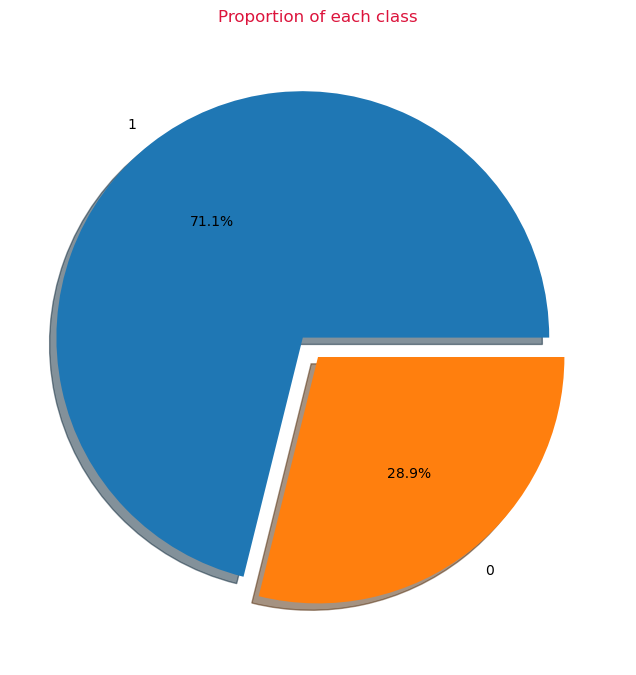

In [19]:
plt.figure(figsize=(15,8))
labels = df_sampled['class'].value_counts().keys()
values = df_sampled['class'].value_counts().values
explode = (0.1, 0,  )
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each class', fontweight=25, pad=20, color='crimson')
plt.show()

In [20]:
#Tokenize the text into individual words.
#Exclude words that are entirely numeric
#Remove stopwords and non-alphabetic characters

def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word.isalpha])

In [21]:
df_sampled['reviewText'][:10000] = df['reviewText'][:10000].apply(preprocess)

In [22]:
df_sampled['reviewText'][10001:20000] = df['reviewText'][10001:20000].apply(preprocess)

In [23]:
df_sampled['reviewText'][20001:31858] = df['reviewText'][20001:31858].apply(preprocess)

In [24]:
df_sampled['reviewText']

1617395    Best phone case ever . Everywhere I go I get t...
3089194    ITEM NOT SENT Blue Top Company Hong Kong 's tw...
1048159    Saw case theme park store dollars . This good ...
1322794    case fits perfectly I always gets compliments ...
215011     I got year old sister . She loves . I really r...
                                 ...                        
2368010    I tried practically every ear piece since I st...
3052903    The Plantronics Voyager good bluetooth headset...
1602610    I 've really got nothing complain , probably I...
1283644    Very comfortable , beautifully built , round b...
2693993    I picked unit others said 'made ' LG VX . The ...
Name: reviewText, Length: 31858, dtype: object

In [25]:
 # Convert the 'reviewText' column to lowercase
df_sampled['reviewText'] = df_sampled['reviewText'].str.lower()

In [26]:
df_sampled['reviewText']

1617395    best phone case ever . everywhere i go i get t...
3089194    item not sent blue top company hong kong 's tw...
1048159    saw case theme park store dollars . this good ...
1322794    case fits perfectly i always gets compliments ...
215011     i got year old sister . she loves . i really r...
                                 ...                        
2368010    i tried practically every ear piece since i st...
3052903    the plantronics voyager good bluetooth headset...
1602610    i 've really got nothing complain , probably i...
1283644    very comfortable , beautifully built , round b...
2693993    i picked unit others said 'made ' lg vx . the ...
Name: reviewText, Length: 31858, dtype: object

In [27]:
# Define a function to stem words in a given text
# Apply the stemming function to the 'reviewText' column in df_sampled
# reduces words to their root or base form.

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df_sampled['reviewText'] = df_sampled['reviewText'].apply(lambda x: stem_words(x))

In [28]:
# Create a lemmatizer object from NLTK's WordNetLemmatizer
# Define a function to lemmatize words in a given text
# Apply the lemmatization function to the 'reviewText' column in df_sampled

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df_sampled['reviewText'] = df_sampled['reviewText'].apply(lambda text: lemmatize_words(text))

In [29]:
df_sampled['reviewText'].head

<bound method NDFrame.head of 1617395    best phone case ever . everywher i go i get to...
3089194    item not sent blue top compani hong kong 's tw...
1048159    saw case theme park store dollar . thi good qu...
1322794    case fit perfectli i alway get compliment n't ...
215011     i got year old sister . she love . i realli re...
                                 ...                        
2368010    i tri practic everi ear piec sinc i start use ...
3052903    the plantron voyag good bluetooth headset curr...
1602610    i 've realli got noth complain , probabl i cam...
1283644    veri comfort , beauti built , round beauti car...
2693993    i pick unit other said 'made ' lg vx . the lg ...
Name: reviewText, Length: 31858, dtype: object>

Second Page. Feature Enginerring

In [30]:
#Creating a New Column 'length'
#the length of the corresponding 'reviewText' is calculated using the len function
df_sampled['length'] = df_sampled['reviewText'].apply(len)

In [31]:
df_sampled.info

<bound method DataFrame.info of                               _id                     category  class  \
1617395  5a132224741a2384e81d941a  Cell_Phones_and_Accessories      1   
3089194  5a132269741a2384e835d60b  Cell_Phones_and_Accessories      1   
1048159  5a132209741a2384e8142d5f  Cell_Phones_and_Accessories      1   
1322794  5a132216741a2384e818b740  Cell_Phones_and_Accessories      1   
215011   5a1321e0741a2384e80658c2  Cell_Phones_and_Accessories      1   
...                           ...                          ...    ...   
2368010  5a132248741a2384e829f3bf  Cell_Phones_and_Accessories      1   
3052903  5a132267741a2384e8353cbc  Cell_Phones_and_Accessories      1   
1602610  5a132224741a2384e81d559b  Cell_Phones_and_Accessories      0   
1283644  5a132214741a2384e8181279  Cell_Phones_and_Accessories      1   
2693993  5a132257741a2384e82f51db  Cell_Phones_and_Accessories      1   

         overall                                         reviewText  \
1617395        5  be

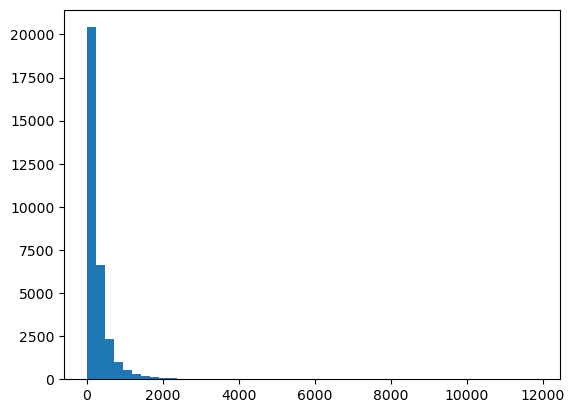

In [32]:
plt.hist(df_sampled['length'], bins=50)
plt.show()

In [33]:
#values in the 'class' column and then calculating descriptive statistics for each group
df_sampled.groupby('class').describe()

overall                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
class                                                                  
0       9197.0  1.864412  0.868966  1.0  1.0  2.0  3.0  3.0   9197.0   
1      22661.0  4.734875  0.441410  4.0  4.0  5.0  5.0  5.0  22661.0   

                                                                 
             mean         std  min   25%    50%    75%      max  
class                                                            
0      290.910949  373.536764  3.0  96.0  169.0  336.0   6449.0  
1      287.297339  372.559770  2.0  96.0  168.0  330.0  11856.0

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

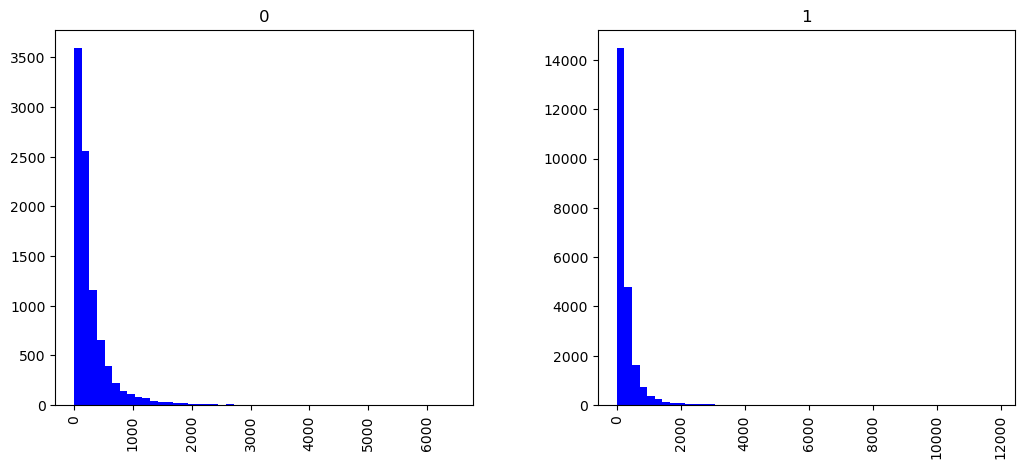

In [34]:
#histograms to visually explore and compare the distribution of data lengths ('length' column) for different classes in the DataFrame
df_sampled.hist(column='length', by='class', bins=50, color='blue', figsize=(12,5))

In [35]:
#retrieve and display the text of the review with the longest length in the DataFrame
df_sampled[['reviewText', 'length']].sort_values(by='length', ascending=False).head().iloc[0]['reviewText']


"spoiler alert : stupidli long review . i like provid much detail possibl i write review , & # ; sort thing i look review . buy thing onlin retail great , prevent u get hands-on inform & # ; alreadi shell money . detail review best way combat disappoint buyer & # ; remors . so either get popcorn and/or coffe , skip end , skip review entir & # ; serious though , & # ; long review . prepar yourself.thi headset close ideal i 'm probabl ever go get , least headset implant subderm behind ear , music commun beam directli brain someth . it great sound , featur , fit , look . there downsid i 'll get way first , i get back gush thing . first , i feel earbud cord mayb .5 .75 inch short . i wear mainli i & # ; work , underneath collar polo shirt . the cord therefor dip edg collar , make trip back ear . it 's fine i 'm look straight ahead , i turn head much tug 'outsid ' ear ( i look left , tug right ear vice versa ) . i 've gotten around somewhat remov littl silicon o-r intend manag earbud cord .

In [36]:
df_sampled.length.describe()

count    31858.000000
mean       288.340542
std        372.839810
min          2.000000
25%         96.000000
50%        168.000000
75%        331.000000
max      11856.000000
Name: length, dtype: float64

In [37]:
#prepare text data for analysis or machine learning
#filter out irrelevant information such as punctuation and common words.
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
#transforms a list of text into a bag-of-words representation.
#bow_transformer is now configured to preprocess text using the text_process function 
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000022D763E4720>)

In [39]:
#preparing a bag-of-words representation for the 'reviewText' column and printing the size of the vocabulary.
bow_transformer.fit(df_sampled['reviewText'])
print("total vocabulary:",len(bow_transformer.vocabulary_))

total vocabulary: 44411


In [40]:
review4 = df_sampled['reviewText'].iloc[4]
print(review4)

i got year old sister . she love . i realli realli n't complaint . yeah


In [41]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 9427)	1
  (0, 17222)	1
  (0, 23020)	1
  (0, 26547)	1
  (0, 27006)	1
  (0, 31849)	2
  (0, 35326)	1
  (0, 44068)	1
  (0, 44070)	1
(1, 44411)


In [42]:


# Assuming df_sampled['reviewText'] is your reviews corpus
corpus = df_sampled['reviewText']

# Initialize and fit CountVectorizer
bow_transformer = CountVectorizer()
bow_reviews = bow_transformer.fit_transform(corpus)

# Print the shape and number of non-zero values
print("Shape of bag of words transformer for the entire reviews corpus:", bow_reviews.shape)
print("Amount of non-zero values in the bag of words model:", bow_reviews.nnz)

Shape of bag of words transformer for the entire reviews corpus: (31858, 27997)
Amount of non-zero values in the bag of words model: 1128515


In [43]:

#sparsity helps you understand how spread out or concentrated the words are across your documents

print("sparsity:", np.round((bow_reviews.nnz / (bow_reviews.shape[0] * bow_reviews.shape[1])) * 100, 2))

sparsity: 0.13


In [44]:
# split the dataset into training and testing sets
review_train, review_test, class_train, class_test = train_test_split(df_sampled['reviewText'],df_sampled['class'],test_size = 0.35)

In [45]:
vectorizer = CountVectorizer(analyzer=text_process)
bow_reviews = vectorizer.fit_transform(review_train)
bow_msg4 = vectorizer.transform([review4])

tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 6944)	1
  (0, 12717)	1
  (0, 16982)	1
  (0, 19596)	1
  (0, 19938)	1
  (0, 23547)	2
  (0, 26093)	1
  (0, 32640)	1
  (0, 32642)	1


In [46]:

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['good']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['ok']])


10.245128197461847
10.245128197461847


In [47]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("shape:", tfidf_reviews.shape)
print("no. of dimensions:", tfidf_reviews.ndim)

shape: (20707, 32893)
no. of dimensions: 2


crating training and testing data

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [55]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

traning and testing MUltinomial Naive Bayes algorithm on preprocessed data

In [56]:
pipeline.fit(review_train,class_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FF0CC7B1A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [57]:
predictions = pipeline.predict(review_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
# Assuming 'pipeline' is your trained classifier
y_probabilities = pipeline.predict_proba(review_test)
y_predictions = (y_probabilities[:, 1] > 0.3).astype(int)


In [59]:
print('Classification Report:' , classification_report(class_test,predictions))
print('Confusion matrix:', confusion_matrix(class_test,predictions))
print('Accuracy score:', accuracy_score(class_test,predictions))

Classification Report:               precision    recall  f1-score   support

           0       0.12      0.00      0.00      3238
           1       0.71      1.00      0.83      7913

    accuracy                           0.71     11151
   macro avg       0.42      0.50      0.42     11151
weighted avg       0.54      0.71      0.59     11151

Confusion matrix: [[   1 3237]
 [   7 7906]]
Accuracy score: 0.7090843870504887


In [60]:
str(np.round(accuracy_score(class_test, predictions) * 100, 2)) + '%'


'70.91%'

RANDOM FOREST Classifier


In [61]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [62]:
pipeline.fit(review_train,class_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FF0CC7B1A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [63]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
print('Classification Report:' , classification_report(class_test,rfc_pred))
print('Confusion matrix:', confusion_matrix(class_test,rfc_pred))
print('Accuracy score:', accuracy_score(class_test,rfc_pred))
print('Model prediction Accuracy:' , str(np.round(accuracy_score(class_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.31      0.01      0.01      3238
           1       0.71      0.99      0.83      7913

    accuracy                           0.71     11151
   macro avg       0.51      0.50      0.42     11151
weighted avg       0.59      0.71      0.59     11151

Confusion matrix: [[  19 3219]
 [  43 7870]]
Accuracy score: 0.7074701820464532
Model prediction Accuracy: 70.75%


svc

In [50]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [51]:
pipeline.fit(review_train,class_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022D763E4720>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [55]:
svc_pred = pipeline.predict(review_test)

In [56]:
print('Classification Report:' , classification_report(class_test,svc_pred))
print('Confusion matrix:', confusion_matrix(class_test,svc_pred))

print('Accuracy score:', accuracy_score(class_test,svc_pred))
print('Model prediction Accuracy:' , str(np.round(accuracy_score(class_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.25      0.00      0.00      3227
           1       0.71      1.00      0.83      7924

    accuracy                           0.71     11151
   macro avg       0.48      0.50      0.42     11151
weighted avg       0.58      0.71      0.59     11151

Confusion matrix: [[   2 3225]
 [   6 7918]]
Accuracy score: 0.7102502017756255
Model prediction Accuracy: 71.03%
